In [58]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

output_data = {}
output_data['train_set_x'] = np.empty(shape=(140, 60, 60, 3),dtype='u1')

cnt = 0
for file_name in range(1, 71):
    trace_file = open('trace/6/' + str(file_name) + '.txt', 'r')
    line = trace_file.readline()
    
    data = line.split('|')[1].split(',')
    i = j = 0
    for d in data:
        d = int(d)
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][1] = 128
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][1] = 255
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][2] = 128
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][2] = 255
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][0] = 255
            
        j += 1
        if j >= 60:
            j = 0
            i += 1
            if i >= 60:
                break
    cnt += 1

for file_name in range(1, 71):
    trace_file = open('trace/p' + str(file_name) + '.txt', 'r')
    line = trace_file.readline()
    
    data = line.split(',')
    i = j = 0
    for d in data:
        d = int(d)
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][1] = 128
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][1] = 255
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][2] = 128
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][2] = 255
        d //= 2
        if d & 1 == 1:
            output_data['train_set_x'][cnt][i][j][0] = 255
            
        j += 1
        if j >= 60:
            j = 0
            i += 1
            if i >= 60:
                break
    cnt += 1
        
output_data['train_set_y'] = np.zeros(140, dtype=int)

for i in range(70, 140):
    output_data['train_set_y'][i] = 1

    
output_data['test_set_x'] = np.empty(shape=(49, 60, 60, 3),dtype='u1')
cnt = 0
for file_name in range(71, 106):
    trace_file = open('trace/6/' + str(file_name) + '.txt', 'r')
    line = trace_file.readline()
    
    data = line.split('|')[1].split(',')
    i = j = 0
    for d in data:
        d = int(d)
        if d & 1 == 0:
            output_data['test_set_x'][cnt][i][j][1] = 0
        else:
            output_data['test_set_x'][cnt][i][j][1] = 255
        d //= 4
        if d & 1 == 0:
            output_data['test_set_x'][cnt][i][j][2] = 0
        else:
            output_data['test_set_x'][cnt][i][j][2] = 255
        d //= 4
        if d & 1 == 0:
            output_data['test_set_x'][cnt][i][j][0] = 0
        else:
            output_data['test_set_x'][cnt][i][j][0] = 255
            
        j += 1
        if j >= 60:
            j = 0
            i += 1
            if i >= 60:
                break
    cnt += 1

for file_name in range(71, 85):
    trace_file = open('trace/p' + str(file_name) + '.txt', 'r')
    line = trace_file.readline()
    
    data = line.split(',')
    i = j = 0
    for d in data:
        d = int(d)
        if d & 1 == 0:
            output_data['test_set_x'][cnt][i][j][1] = 0
        else:
            output_data['test_set_x'][cnt][i][j][1] = 255
        d //= 4
        if d & 1 == 0:
            output_data['test_set_x'][cnt][i][j][2] = 0
        else:
            output_data['test_set_x'][cnt][i][j][2] = 255
        d //= 4
        if d & 1 == 0:
            output_data['test_set_x'][cnt][i][j][0] = 0
        else:
            output_data['test_set_x'][cnt][i][j][0] = 255
            
        j += 1
        if j >= 60:
            j = 0
            i += 1
            if i >= 60:
                break
    cnt += 1

output_data['test_set_y'] = np.zeros(49, dtype=int)

for i in range(35, 49):
    output_data['test_set_y'][i] = 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
train_x_orig = np.array(output_data['train_set_x'][:])
train_y = np.array(output_data['train_set_y'])
test_x_orig = np.array(output_data['test_set_x'][:])
test_y = np.array(output_data['test_set_y'])
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))
classes = [b'cryptojacking', b'normal']

y = 0. It's a cryptojacking picture.


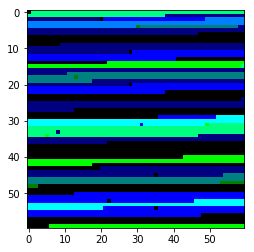

In [60]:
# Example of a picture
index = 6
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [61]:
# Explore dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 140
Number of testing examples: 49
Each image is of size: (60, 60, 3)
train_x_orig shape: (140, 60, 60, 3)
train_y shape: (1, 140)
test_x_orig shape: (49, 60, 60, 3)
test_y shape: (1, 49)


In [62]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (10800, 140)
test_x's shape: (10800, 49)


In [63]:
### CONSTANTS ###
layers_dims = [10800, 108, 36, 6, 1] #  4-layer model

In [64]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.005, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.705513
Cost after iteration 100: 0.361766
Cost after iteration 200: 0.166606
Cost after iteration 300: 0.083014
Cost after iteration 400: 0.046565
Cost after iteration 500: 0.029108
Cost after iteration 600: 0.019980
Cost after iteration 700: 0.014690
Cost after iteration 800: 0.011358
Cost after iteration 900: 0.009113
Cost after iteration 1000: 0.007522
Cost after iteration 1100: 0.006352
Cost after iteration 1200: 0.005456
Cost after iteration 1300: 0.004756
Cost after iteration 1400: 0.004197
Cost after iteration 1500: 0.003743
Cost after iteration 1600: 0.003368
Cost after iteration 1700: 0.003053
Cost after iteration 1800: 0.002786
Cost after iteration 1900: 0.002558


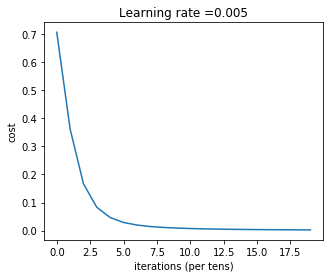

In [65]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2000, print_cost = True)

In [66]:
pred_train = predict(train_x, train_y, parameters)

70 : 0.9984303644682968
71 : 0.9967497891085974
72 : 0.9999583635284223
73 : 0.9999777034045105
74 : 0.999993593596938
75 : 0.9999974799208621
76 : 0.9999999199766079
77 : 0.9999991123013308
78 : 0.9994635935802846
79 : 0.9972908161148482
80 : 0.9998256982154612
81 : 0.9986072264749121
82 : 0.9970703140581544
83 : 0.9998082190615766
84 : 0.9959925181861055
85 : 0.9963507944573722
86 : 0.9999615617988125
87 : 0.9991225384757412
88 : 0.999437469798534
89 : 0.9997588470115685
90 : 0.9976360547834145
91 : 0.99921737188241
92 : 0.9988260176507759
93 : 0.9964236168038965
94 : 0.9983190471807364
95 : 0.9999977011877136
96 : 0.999701460051902
97 : 0.9991508257080307
98 : 0.9989888990761938
99 : 0.9937066380835613
100 : 0.9999341815273322
101 : 0.9998671584812253
102 : 0.9999259852110078
103 : 0.9999093154612155
104 : 0.9848405601266467
105 : 0.9991898345898826
106 : 0.9992566481664571
107 : 0.999929779365542
108 : 0.9997043625176218
109 : 0.9977520558260564
110 : 0.9999750460415263
111 : 0.999

In [67]:
pred_test = predict(test_x, test_y, parameters)

2 : 0.7250804618482264
3 : 0.9987489668485895
8 : 0.9996620830002916
26 : 0.946880863724679
27 : 0.9180804419535394
33 : 0.5129360167989135
34 : 0.9999978479863607
35 : 0.6909475704470309
37 : 0.9984113392700564
38 : 0.996496059171748
39 : 0.97695054715426
40 : 0.993354381220784
41 : 0.9672007998604571
42 : 0.9999927464169525
43 : 0.999961438794213
44 : 0.9997668176359316
45 : 0.9998904726218726
46 : 0.8565803940020505
47 : 0.9999113692373016
48 : 0.9999593653180687
Accuracy: 0.836734693877551


In [68]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

2
3
8
26
27
33
34
